<a href="https://colab.research.google.com/github/med-fakil/ML-AMCHD-/blob/main/Mini_projet_ML(tentative%203).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pathlib
import os

import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers


In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
data_dir = '/content/drive/MyDrive/archive.zip'
import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

In [53]:
data_dir = pathlib.Path('/content/datasets/AMHCD_64/AMHCD_64')
print("Le répertoire de données : {} ".format(data_dir))

Le répertoire de données : /content/datasets/AMHCD_64/AMHCD_64 


In [54]:
image_count = len(list(data_dir.glob('*/*')))
print("Nombre des images de la base de données : {} ".format(image_count))

Nombre des images de la base de données : 25740 


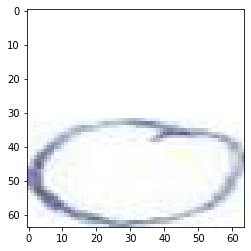

In [55]:
#Exemple d'une image
image = plt.imread("/content/datasets/AMHCD_64/AMHCD_64/ya/ya_1.jpeg")
plt.imshow(image)

In [56]:
#Dimension des image
image.shape

(64, 64, 3)

In [57]:
#Taille des images
img_height = 32
img_width = 32

In [58]:
# train_data est un objet tensor, chaque élement est un tuple (image,label) 
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  #batch_size=batch_size,
  )


Found 25740 files belonging to 33 classes.
Using 20592 files for training.


In [59]:
# val_data est un objet tensor, chaque élement est un tuple (image,label) 
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  #batch_size=batch_size,
  )

Found 25740 files belonging to 33 classes.
Using 5148 files for validation.


In [60]:
class_names = val_data.class_names
print("Les classes :")
print(class_names)
print("Nombre de classe : {} ".format(len(class_names)))

Les classes :
['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagh', 'yagw', 'yah', 'yahh', 'yaj', 'yak', 'yakw', 'yal', 'yam', 'yan', 'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw', 'yax', 'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu']
Nombre de classe : 33 


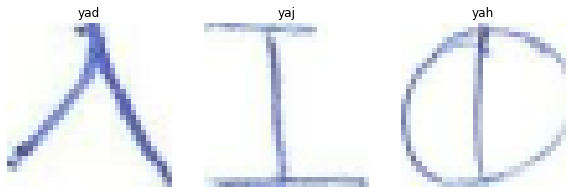

In [61]:
#Visualiser qlq données
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [62]:
"""
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

num_classes = 33

#defining model
model=Sequential()
#Premier couche
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))

#Deuxième couche
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))


#Troisième couche
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

#4ème couche
model.add(Dense(64,activation='relu'))

#5ème couche
model.add(Dense(33,activation='softmax'))
"""

"\nfrom tensorflow.keras import layers\nfrom tensorflow.keras.datasets import mnist\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Conv2D\nfrom tensorflow.keras.layers import MaxPool2D\nfrom tensorflow.keras.layers import Flatten\nfrom tensorflow.keras.layers import Dropout\nfrom tensorflow.keras.layers import Dense\n\nnum_classes = 33\n\n#defining model\nmodel=Sequential()\n#Premier couche\nmodel.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))\n\n#Deuxième couche\nmodel.add(Conv2D(32,(3,3),activation='relu'))\nmodel.add(MaxPool2D(2,2))\nmodel.add(Dropout(0.5))\n\n\n#Troisième couche\nmodel.add(Conv2D(64,(3,3),activation='relu'))\nmodel.add(MaxPool2D(2,2))\nmodel.add(Dropout(0.5))\n\n#4ème couche\nmodel.add(Dense(64,activation='relu'))\n\n#5ème couche\nmodel.add(Dense(33,activation='softmax'))\n"

In [63]:
num_classes = 33

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(32, 32, 3)),

    layers.Conv2D(32,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.5),

    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.5),
    
    layers.Flatten(),

    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [64]:
model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

logdir="logs"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,
                                                   histogram_freq=1, 
                                                   write_images=logdir,
                                                   embeddings_data=train_data)


historique = model.fit( 
             train_data,
             validation_data=val_data,
             epochs=40,
             callbacks=[tensorboard_callback]
)

Epoch 1/40


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


644/644 [==============================] - 10s 14ms/step - loss: 1.3793 - accuracy: 0.6223 - val_loss: 0.2633 - val_accuracy: 0.9272
Epoch 2/40
644/644 [==============================] - 9s 14ms/step - loss: 0.2780 - accuracy: 0.9216 - val_loss: 0.1075 - val_accuracy: 0.9689
Epoch 3/40
644/644 [==============================] - 9s 14ms/step - loss: 0.1664 - accuracy: 0.9521 - val_loss: 0.1437 - val_accuracy: 0.9627
Epoch 4/40
644/644 [==============================] - 9s 13ms/step - loss: 0.1277 - accuracy: 0.9646 - val_loss: 0.0616 - val_accuracy: 0.9806
Epoch 5/40
644/644 [==============================] - 9s 14ms/step - loss: 0.1041 - accuracy: 0.9678 - val_loss: 0.0651 - val_accuracy: 0.9790
Epoch 6/40
644/644 [==============================] - 9s 13ms/step - loss: 0.0919 - accuracy: 0.9725 - val_loss: 0.0477 - val_accuracy: 0.9856
Epoch 7/40
644/644 [==============================] - 9s 14ms/step - loss: 0.0816 - accuracy: 0.9769 - val_loss: 0.0456 - val_accuracy: 0.9876
Epoch 8/4

In [ ]:
import pandas as pd
metrics = pd.DataFrame(historique.history)

In [ ]:
plt.figure(figsize=(10,10))
plt.ylim([0,1])
plt.xlim([0,30])
plt.plot(metrics[["loss","val_loss"]])
plt.grid(True)
plt.show()

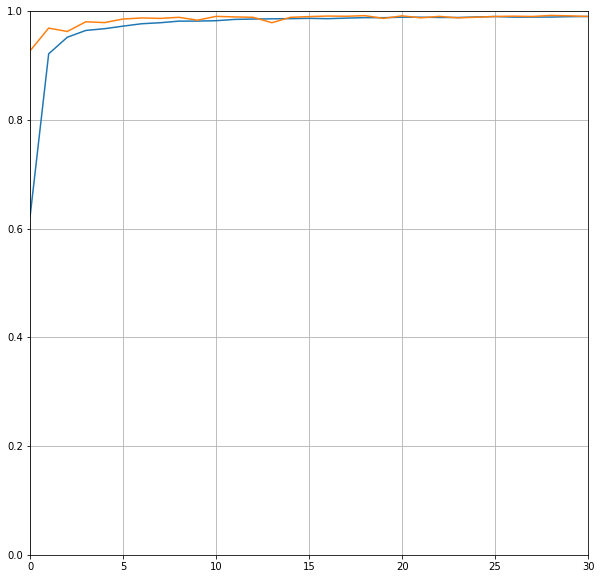

In [67]:
plt.figure(figsize=(10,10))
plt.ylim([0,1])
plt.xlim([0,30])
plt.plot(metrics[["accuracy","val_accuracy"]])
plt.grid(True)
plt.show()

In [68]:
#--------------------------------------------------------------------------------------------------------------

In [69]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [71]:
def create_model():
  # create model
  model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32,(3,3), activation='relu',input_shape=(32, 32, 3)),

  layers.Conv2D(32,(3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(rate=0.5),

  layers.Conv2D(64,(3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(rate=0.5),
    
  layers.Flatten(),

  layers.Dense(64,activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])
   
	# Compile model
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=0.001),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  
  return model

In [72]:
data_labels=[]
data_images=[]
for images, labels in train_data.unbatch():
    data_labels.append(labels)
    data_images.append(images)

    

In [ ]:
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

model = KerasClassifier(model=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 20, 30,40,50]

param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(data_images,data_labels)


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
